## **논문을 구현해보자**
- Layer= Block
- 딥러닝: Layer을 block처럼 쌓아서 다음 단계로 넘기는 것
- 딥러닝의 아키텍쳐=블록 반복의 연속

### torch.nn.Module
- 딥러닝을 구성하는 Layer의 base class
- input, output, forward, backward 정의
- 학습의 대상이 되는 parameter 정의
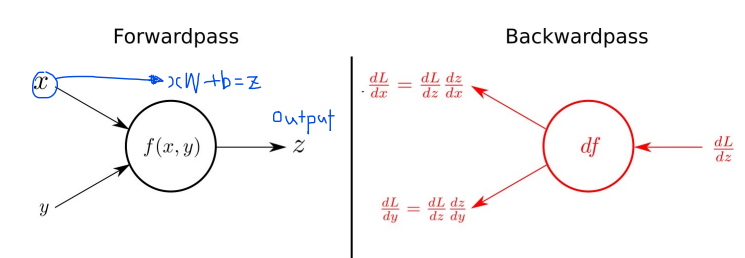

### nn.Parameter
- Tensor 객체의 상속 객체
- nn.Module의 attribute가 될 때는 required_grad=True 해줘야함
-  직접 지정할 일은 잘 없음

In [1]:
import torch
from torch import nn
from torch import Tensor

In [2]:
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = nn.Parameter(
                torch.randn(in_features, out_features)) #파라미터 지정
        
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

In [3]:
x = torch.randn(5, 7) # 데이터가 5개 feature가 7개
x

tensor([[ 0.9499, -1.3285,  0.8902,  0.1661,  2.3624,  1.3199, -0.2234],
        [ 1.0483,  0.4697, -0.0199, -0.9582, -0.1449, -0.5725,  0.2055],
        [-0.2194,  1.2634, -0.8933, -0.1037, -0.5504,  0.8626, -0.2001],
        [ 0.9154, -0.2416,  0.1180, -1.0648,  1.2002, -0.1368, -0.8663],
        [-0.8029,  2.4583, -1.1228, -0.1903,  0.1790, -1.0762,  1.6763]])

In [4]:
layer = MyLiner(7, 12) # 데이터가 5개 feture 12개로 바꿔주고 싶다면
layer(x).shape #layer(x)=5*7-7*12=5*12

torch.Size([5, 12])

In [5]:
for value in layer.parameters():
    print(value) #requires_grad=True(미분이 되는 값들)

Parameter containing:
tensor([[-0.6331,  0.6950, -0.8007,  1.0831,  0.5938, -0.6413, -0.9683, -0.9931,
          1.0614, -0.7077,  1.4082, -0.4097],
        [ 2.3783, -0.5850, -1.3676,  1.2889, -0.4711,  0.2453,  0.2158,  0.8560,
         -0.3913, -0.7543,  0.2099,  0.9151],
        [ 0.4424, -0.4052, -0.8716, -1.4481, -0.1525,  0.2948, -0.5860, -0.4995,
          0.4570,  0.0466, -1.1379,  0.8770],
        [ 0.5936, -1.1061, -0.2777, -0.0338,  0.8851, -0.7169, -0.8002,  0.5175,
          0.0260, -0.2348, -0.5621,  1.6324],
        [ 0.1410,  0.7037, -0.4392,  1.5196, -1.4842, -1.7371,  0.4943, -2.1036,
         -0.3500,  0.5092, -0.7180, -1.1422],
        [-0.1715, -1.1144,  1.3250,  1.2042,  0.6439,  0.6299, -0.3251, -0.4012,
          0.8059, -0.0284,  0.2483,  1.7049],
        [-0.2929,  1.9625, -1.3890, -0.2973, -1.1936, -0.4155, -0.8569,  1.0990,
         -2.8935,  0.0553,  1.0531,  0.4555]], requires_grad=True)
Parameter containing:
tensor([ 0.3141,  1.1350, -0.4439,  1.5471, -0

In [6]:
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = Tensor(
                torch.randn(in_features, out_features))
        
        self.bias = Tensor(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias


layer = MyLiner(7, 12)
layer(x).shape

torch.Size([5, 12])

In [7]:
for value in layer.parameters():
    print(value) #parameter은 미분의 대상이 되는 것들만 보여줄 수 있기 때문에 출력x

### Backward
- Layer에 있는 Parameter들의 미분 수행
- Forward의 결과값 (model의 output)과 실제값 간의 차이(loss)에 대해 미분 수행
- 미분 값으로 Parameter 업데이트

필수 4단계
1. optimizer.zero_grad(): clear gradient buffers
2. loss=criterion(outputs,labels): 예측 결과로부터 loss값 얻음
3. loss.backward() : gradient 값 얻음
4. optimizer.step(() : 파라미터 업데이트

## AutoGrad for Linear Regression
https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

$$ y=2x+1 $$

In [10]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)] #0~10
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values] # 3~21
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [11]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [12]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [13]:
import torch
from torch.autograd import Variable
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize) #Linear함수

    def forward(self, x):
        out = self.linear(x)
        return out

In [14]:
# GPU에서 돌린다고 선언
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = LinearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [15]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate) #SGD의 파라미터 지정

In [16]:
# 보통은 data_loader 사용해서 나눠서 epoch 돌리지만 데이터개수 적어서 한번에 돌림
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(257.7257, grad_fn=<MseLossBackward0>)
epoch 0, loss 257.7256774902344
tensor(21.1687, grad_fn=<MseLossBackward0>)
epoch 1, loss 21.16869354248047
tensor(1.8719, grad_fn=<MseLossBackward0>)
epoch 2, loss 1.8718510866165161
tensor(0.2962, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.29624849557876587
tensor(0.1661, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.16612835228443146
tensor(0.1539, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.15392957627773285
tensor(0.1514, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.1513669639825821
tensor(0.1496, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.1496077924966812
tensor(0.1479, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.14793157577514648
tensor(0.1463, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.14627905189990997
tensor(0.1446, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.1446457952260971
tensor(0.1430, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.14303043484687805
tensor(0.1414, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.1414332538843155
te

In [17]:
# 예측
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)


[[ 0.57077307]
 [ 2.6325858 ]
 [ 4.6943984 ]
 [ 6.7562113 ]
 [ 8.818024  ]
 [10.879836  ]
 [12.941649  ]
 [15.003462  ]
 [17.065273  ]
 [19.127087  ]
 [21.188898  ]]


In [18]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [19]:
for p in model.parameters():
    if p.requires_grad:
         print(p.name, p.data)

None tensor([[2.0618]])
None tensor([0.5708])


### Backward from the scartch
- Module에서 backward와 optimizer 오버라이딩
- 수식 써야되서 복잡함.. 하지만 순서는 중요
  1. init
  2. forward ($ \widehat{y}$)
  3. sigmoid
  4. backward (미분 식 적어줌)
  5. optimize ($W,b$업데이트)

## Logistic Regression

In [20]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## print out the pytorch version used (1.31 at the time of this tutorial)
print(torch.__version__)

1.13.1+cu116


In [21]:
## configuration to detect cuda or cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

cpu


In [22]:
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [23]:
import urllib
import os
import shutil
from zipfile import ZipFile


urllib.request .urlretrieve(DATA_PATH, "hymenoptera_data.zip")



with ZipFile("hymenoptera_data.zip", 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

os.rename("hymenoptera_data", "data")


In [27]:
# 데이터 불러올 수 있는 환경 만들기
## configure root folder on your gdrive
data_dir = "./data"

## custom transformer to flatten the image tensors
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        result = torch.reshape(img, self.new_size)
        return result

## transformations used to standardize and normalize the datasets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
}

## load the correspoding folders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

## 데이터 패치
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size=len(image_datasets['train']),
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                           batch_size=len(image_datasets['val']),
                                           shuffle=True)

Dimension of image: torch.Size([244, 150528]) 
 Dimension of labels torch.Size([244])


<ipython-input-28-0d853e01fe89>:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())


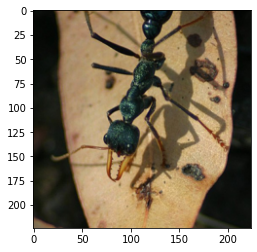

In [28]:
## load the entire dataset
x, y = next(iter(train_dataset))

## print one example
dim = x.shape[1]
print("Dimension of image:", x.shape, "\n", 
      "Dimension of labels", y.shape)

plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())

In [30]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        # intialize parameters
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {"dw": torch.zeros(dim, 1, dtype=torch.float).to(device),
                      "db": torch.scalar_tensor(0).to(device)} # 자동미분 아니라서 parameter 지정 안해줌
        self.lr = lr.to(device)

    def forward(self, x):
        ## compute forward
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a

    def sigmoid(self, z):
        return 1/(1 + torch.exp(-z))

    def backward(self, x, yhat, y):
        ## compute backward
        self.grads["dw"] = (1/x.shape[1]) * torch.mm(x, (yhat - y).T)
        self.grads["db"] = (1/x.shape[1]) * torch.sum(yhat - y)
    
    def optimize(self):
        ## optimization step
        self.w = self.w - self.lr * self.grads["dw"]
        self.b = self.b - self.lr * self.grads["db"]

## utility functions
def loss(yhat, y):
    m = y.size()[1]
    return -(1/m)* torch.sum(y*torch.log(yhat) + (1 - y)* torch.log(1-yhat))
# 예측치
def predict(yhat, y):
    y_prediction = torch.zeros(1, y.size()[1])
    for i in range(yhat.size()[1]):
        if yhat[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

In [31]:
## model pretesting
x, y = next(iter(train_dataset))

## flatten/transform the data
x_flatten = x.T
y = y.unsqueeze(0) 

## num_px is the dimension of the images
dim = x_flatten.shape[0]

## model instance
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

## calculate loss
cost = loss(yhat, y)
prediction = predict(yhat, y) #학습시켜주기
print("Cost: ", cost)
print("Accuracy: ", prediction)

## backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost:  tensor(0.6931)
Accuracy:  tensor(50.4098)


In [32]:
## hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform the data
def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0) 
    return x_flatten, y 

## 모델 학습시키기
for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x, y)
    test_x, test_y = transform_data(test_x, test_y)

    # forward
    yhat = lrmodel.forward(x.to(device)) #yhat 불러오기
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat, y)
        
    # backward
    lrmodel.backward(x.to(device), #미분
                    yhat.to(device), 
                    y.to(device))
    # 미분 값 업데이트
    lrmodel.optimize()
    ## test
    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)

    if i % 10 == 0:
        costs.append(cost)

    if i % 10 == 0:
        print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i, 
                                                                                    cost, 
                                                                                    train_pred,
                                                                                    test_pred))


Cost after iteration 0: 0.6931472420692444 | Train Acc: 50.40983581542969 | Test Acc: 45.75163269042969
Cost after iteration 10: 0.6691470742225647 | Train Acc: 64.3442611694336 | Test Acc: 54.24836730957031
Cost after iteration 20: 0.6513183116912842 | Train Acc: 68.44261932373047 | Test Acc: 54.24836730957031
Cost after iteration 30: 0.6367825269699097 | Train Acc: 68.03278350830078 | Test Acc: 54.24836730957031
Cost after iteration 40: 0.6245337128639221 | Train Acc: 69.67213439941406 | Test Acc: 54.90196228027344
Cost after iteration 50: 0.6139225959777832 | Train Acc: 70.90164184570312 | Test Acc: 56.20914840698242
Cost after iteration 60: 0.6045236587524414 | Train Acc: 72.54098510742188 | Test Acc: 56.86274337768555
Cost after iteration 70: 0.5960511565208435 | Train Acc: 74.18032836914062 | Test Acc: 57.51633834838867
Cost after iteration 80: 0.5883085131645203 | Train Acc: 73.77049255371094 | Test Acc: 57.51633834838867
Cost after iteration 90: 0.5811558365821838 | Train Acc: 

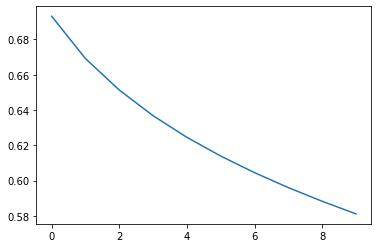

In [33]:

## the trend in the context of loss
plt.plot(costs)
plt.show()

## Further Question

1. epoch에서 이뤄지는 모델 학습 과정을 정리해보고 성능을 올리기 위해서 어떤 부분을 먼저 고려하면 좋을지 같이 논의해보세요
  - 모델의 구조, 성능, loss function을 먼저 고려, 이후 optimizer 및 hyper parameter 조정을 통해 성능 향상
2. optimizer.zero_grad()를 안하면 어떤 일이 일어날지 그리고 매 batch step마다 항상 필요한지 같이 논의해보세요
  - gradient가 버퍼가 초기화되지 않고 계속 누적되어 backward 계산이 제대로 안됨